In [1]:
import os

import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

import src.dataset.utils as dutils
import src.modelling.utils as mutils
from src.modelling.resnet_model import ResNet

%load_ext autoreload
%autoreload 2

## Training Parameters

In [2]:
DATA_DIR = "./data/"
BATCH_SIZE = 32
EPOCHS = 20
MAX_LR = 0.01
GRAD_CLIP = 0.1
WEIGHT_DECAY = 1e-4

## DataLoaders

In [3]:
image_transformer = dutils.get_default_image_transformer()

train_loader = DataLoader(
    dataset=ImageFolder(os.path.join(DATA_DIR, "train"), transform=image_transformer),
    batch_size=BATCH_SIZE,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
)

valid_loader = DataLoader(
    dataset=ImageFolder(os.path.join(DATA_DIR, "valid"), transform=image_transformer),
    batch_size=BATCH_SIZE,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
)

test_loader = DataLoader(
    dataset=ImageFolder(os.path.join(DATA_DIR, "test"), transform=image_transformer),
    batch_size=BATCH_SIZE,
    pin_memory=True,
    num_workers=4,
)

## Training Loop

In [6]:
from datetime import datetime

opts = {
    "Adam": {
        "object": torch.optim.Adam,
        "history": []
    },
    "SGD": {
        "object": torch.optim.SGD,
        "history": []
    },
    "RMSprop": {
        "object": torch.optim.RMSprop,
        "history": []
    },
}

for opt_name, optimizer in opts.items():
    
    model = ResNet(in_channels=3, n_classes=4)
    opt = optimizer['object'](model.parameters(), lr=MAX_LR, weight_decay=WEIGHT_DECAY)
    
    opts[opt_name]['history'] = mutils.train_model(
        model=model, 
        epochs=EPOCHS,
        train_loader=train_loader,
        valid_loader=valid_loader,
        optimizer=opt,
        max_lr=MAX_LR,
        weight_decay=WEIGHT_DECAY,
        grad_clip=GRAD_CLIP,
    )
    
    mutils.evaluate_model(model=model, loader=test_loader)
    mutils.save_model_to_directory(model=model, directory='models', opt_name=opt_name)

Epoch [0] | lr: 0.00061 | train loss: 0.3721 | valid loss: 0.6998 | accuracy: 0.7617
Epoch [1] | lr: 0.00184 | train loss: 0.3556 | valid loss: 0.9520 | accuracy: 0.6739
Epoch [2] | lr: 0.00397 | train loss: 0.3659 | valid loss: 0.8467 | accuracy: 0.6935
Epoch [3] | lr: 0.00643 | train loss: 0.3773 | valid loss: 0.5475 | accuracy: 0.7942
Epoch [4] | lr: 0.00856 | train loss: 0.3833 | valid loss: 1.4248 | accuracy: 0.5748
Epoch [5] | lr: 0.00979 | train loss: 0.3319 | valid loss: 0.8365 | accuracy: 0.7905
Epoch [6] | lr: 0.00996 | train loss: 0.2786 | valid loss: 0.6131 | accuracy: 0.6738
Epoch [7] | lr: 0.00971 | train loss: 0.2453 | valid loss: 0.3478 | accuracy: 0.7727
Epoch [8] | lr: 0.00922 | train loss: 0.1573 | valid loss: 1.1515 | accuracy: 0.7708
Epoch [9] | lr: 0.00852 | train loss: 0.2115 | valid loss: 0.5253 | accuracy: 0.7803
Epoch [10] | lr: 0.00765 | train loss: 0.1562 | valid loss: 1.5608 | accuracy: 0.6235
Epoch [11] | lr: 0.00664 | train loss: 0.1552 | valid loss: 0.13

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 167.84it/s]

Accuracy for test set: 0.9988165680473373


Epoch [0] | lr: 0.00061 | train loss: 0.3436 | valid loss: 0.4849 | accuracy: 0.7426
Epoch [1] | lr: 0.00184 | train loss: 0.2900 | valid loss: 2.2815 | accuracy: 0.5657
Epoch [2] | lr: 0.00397 | train loss: 0.2847 | valid loss: 1.1361 | accuracy: 0.6986
Epoch [3] | lr: 0.00643 | train loss: 0.2766 | valid loss: 1.4325 | accuracy: 0.7039
Epoch [4] | lr: 0.00856 | train loss: 0.3165 | valid loss: 1.3909 | accuracy: 0.7606
Epoch [5] | lr: 0.00979 | train loss: 0.3176 | valid loss: 1.1292 | accuracy: 0.6159
Epoch [6] | lr: 0.00996 | train loss: 0.2772 | valid loss: 1.7933 | accuracy: 0.7259
Epoch [7] | lr: 0.00971 | train loss: 0.2651 | valid loss: 0.5343 | accuracy: 0.7877
Epoch [8] | lr: 0.00922 | train loss: 0.2043 | valid loss: 0.2849 | accuracy: 0.8652
Epoch [9] | lr: 0.00852 | train loss: 0.1951 | valid loss: 0.3955 | accuracy: 0.8485
Epoch [10] | lr: 0.00765 | train loss: 0.1967 | valid loss: 0.1972 | accuracy: 0.9444
Epoch [11] | lr: 0.00664 | train loss: 0.1499 | valid loss: 0.17

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 167.24it/s]

Accuracy for test set: 0.9976331360946745


Epoch [0] | lr: 0.00061 | train loss: 0.7218 | valid loss: 0.8115 | accuracy: 0.5859
Epoch [1] | lr: 0.00184 | train loss: 0.5247 | valid loss: 1.5253 | accuracy: 0.5096
Epoch [2] | lr: 0.00397 | train loss: 0.6507 | valid loss: 16.7564 | accuracy: 0.6345
Epoch [3] | lr: 0.00643 | train loss: 0.6271 | valid loss: 1.0282 | accuracy: 0.5211
Epoch [4] | lr: 0.00856 | train loss: 0.5683 | valid loss: 0.7498 | accuracy: 0.6796
Epoch [5] | lr: 0.00979 | train loss: 0.4920 | valid loss: 2.0603 | accuracy: 0.5803
Epoch [6] | lr: 0.00996 | train loss: 0.5246 | valid loss: 1.6324 | accuracy: 0.4412
Epoch [7] | lr: 0.00971 | train loss: 0.7842 | valid loss: 1.6019 | accuracy: 0.4656
Epoch [8] | lr: 0.00922 | train loss: 1.0968 | valid loss: 3.7582 | accuracy: 0.6865
Epoch [9] | lr: 0.00852 | train loss: 0.8313 | valid loss: 16.7877 | accuracy: 0.5090
Epoch [10] | lr: 0.00765 | train loss: 0.5528 | valid loss: 0.3983 | accuracy: 0.8693
Epoch [11] | lr: 0.00664 | train loss: 0.5553 | valid loss: 15

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 147.82it/s]

Accuracy for test set: 0.9372781065088758


## Evaluation on Validation Set

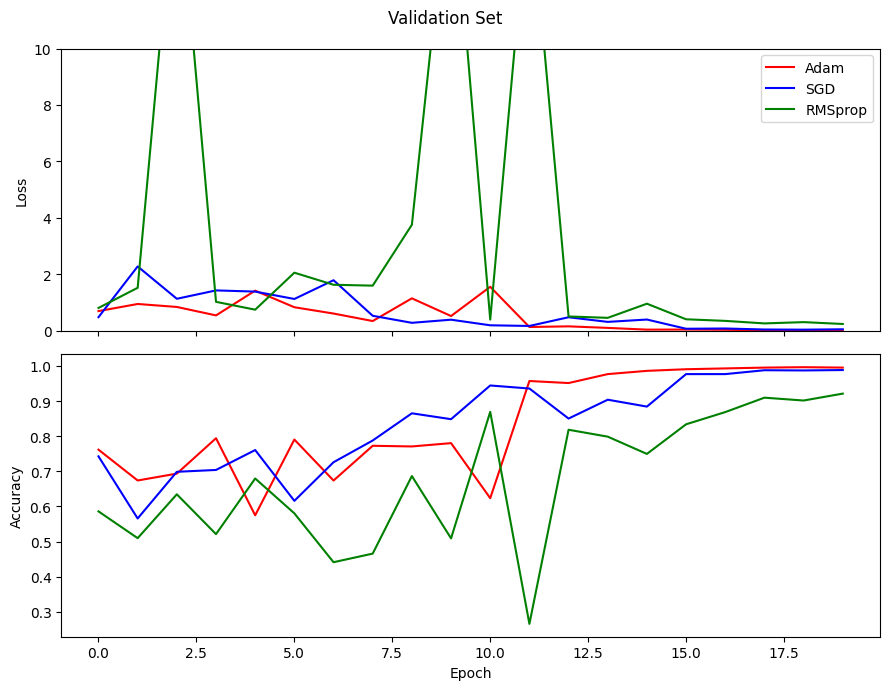

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(9, 7), dpi=100, sharex=True)

colors = {
    'Adam': 'red',
    'SGD': 'blue',
    'RMSprop': 'green',
}

for opt_name in ['Adam', 'SGD', 'RMSprop']:
    valid_losses = [d['valid_loss'] for d in opts[opt_name]['history']]
    valid_accuracy = [d['valid_accuracy'] for d in opts[opt_name]['history']]
    axs[0].plot(valid_losses, color=colors[opt_name], label=opt_name)
    axs[1].plot(valid_accuracy, color=colors[opt_name], label=opt_name)

axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper right')
axs[0].set_ylim(0, 10)
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')

fig.suptitle('Validation Set')
fig.tight_layout()
fig.savefig('./images/learning_curves.png', bbox_inches='tight')